#### Intro: Suppose we have a performance matrix S, i.e. rows = datasets, columns = algorithms, thus the value of element S_{i,j} corresponds to the performance of of algorithm j applied to dataset i.         
For the moment, we suppose that S is full (this is necessary because some of these visualizations are based on SVD). For S with missing values, matrix-completion / 'softer' SVD will be added.

This ipython notebook will show you some functions to visualize such a matrix S.

In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# Set up everything
DATA_DIR = 'DATASETS/'
FIG_DIR = 'TEST-FIG/Displayer/' # plots will be saved here

In [23]:
# Load performance matrix as array
S = np.loadtxt(os.path.join(DATA_DIR, 'artificial/r50c20r20.data'))

In [24]:
# Create a Displayer object
from utils.matrix_displayer import Displayer
help(Displayer)
D = Displayer(S, name='artificial', save=True, save_dir=FIG_DIR, global_norm=True)

Help on class Displayer in module utils.matrix_displayer:

class Displayer(__builtin__.object)
 |  Visualization tools for a performance matrix.
 |  Inputs: 
 |                  - M: array. The input performance matrix
 |                  - name: string. Will be used as title for plots
 |                  - save: bool. Whether to save the plots. If true, use save_dir to indicate the path.
 |                  - global_norm: bool. Wheter to normalize the matrix globally before any visualization. True by default.
 |                  - log: bool. Wheter to take natural logarithm of the matrix before any visualization. False by default.
 |                  - metric_error: bool. By default we suppose the performance (i.e. values of M) represents some `scores' 
 |                  for which higher is better. If metric_error set to True, then lower is better and -M (rather than M)
 |                  will be displyed.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, M, name, save, save_d

#### I. Display the raw matrix S, missing values, if any will be shown in blank

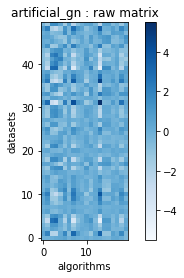

In [25]:
D.plot_raw_matrix_with_missing_values()

#### II. Display the raw matrix S, but arrange its columns by descending median. Then for each row (dataset), the max values will be indicated with a red dot. This allows us to understand how good it will be if we choose always the algorithm with max median.

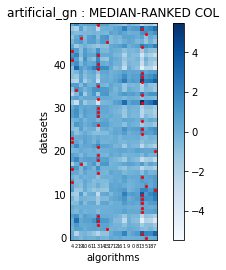

In [33]:
D.plot_matrix_with_missing_value_median()

#### III. Display the raw matrix S, but arrange its columns by descending svd-projection (i.e. we decompose S by SVD, then rank the columns by their projection to principal axes given by SVD). Then for each row (dataset), the max values will be indicated with a red dot. This allows us to understand how good it will be if we choose always the algorithm with max svd projection.

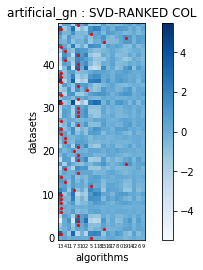

In [32]:
D.plot_matrix_with_missing_value_svd()

#### IV. Display the spectrum of S. By spectrum we mean, supposing S is full, its singular values (as given by SVD decomposition). This helps us to understand how far we can go with a low-rank approximation.

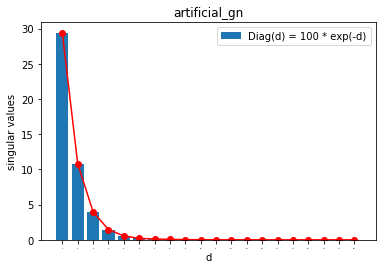

In [36]:
D.plot_spectrum()

#### V. Display the hierarchical clustering of S. This helps us to visualize how correlated the algo / datasets are. This eventual correlation is a sign of how doable the transfer learning (acorss algo / datasets) is.

/Users/lishengsun/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


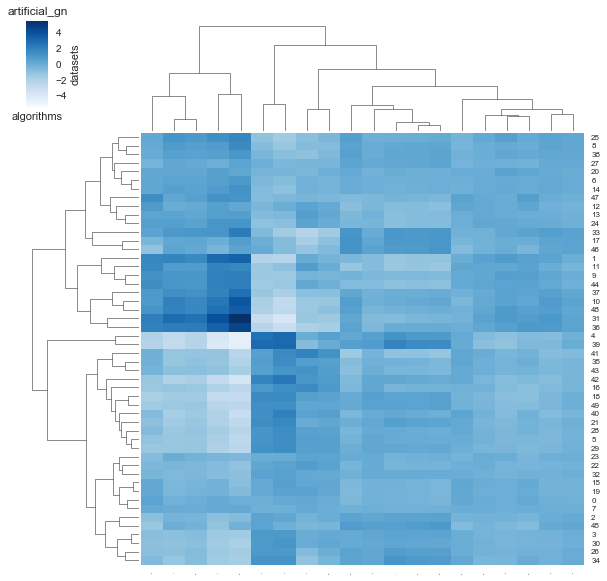

In [37]:
D.plot_hierarchical_clustering(metric='euclidean')

#### VI. Or, you can plot everything in one shot:

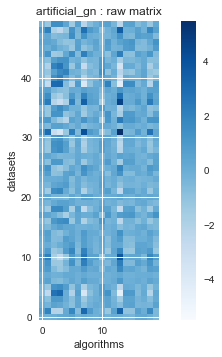

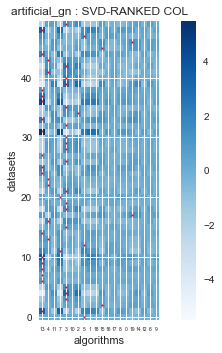

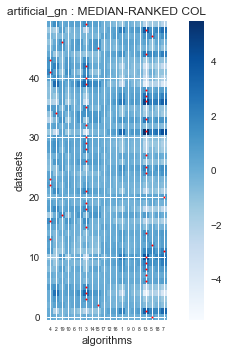

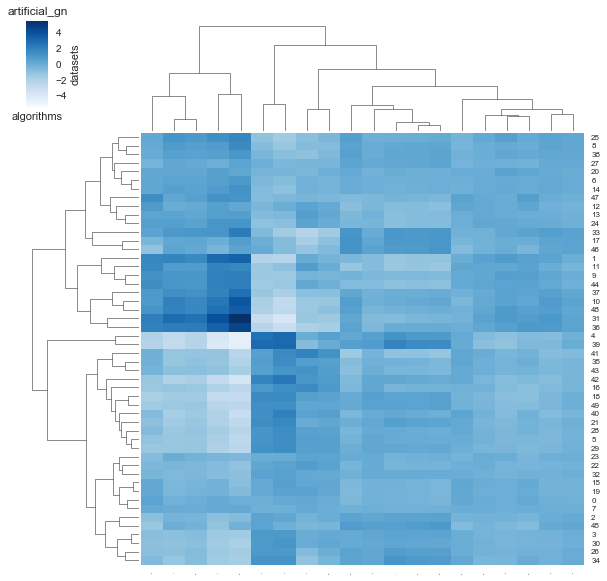

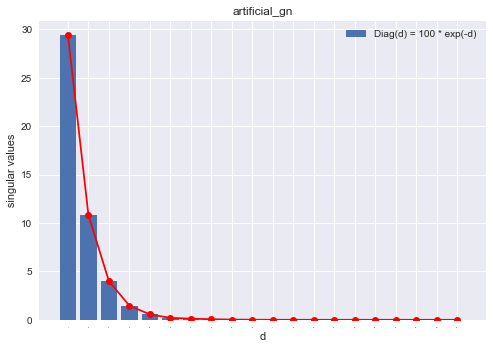

In [38]:
D.display_all()